# **Data Preprocessing**

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

In [ ]:
# dataset doesn't have column names, so we have to provide it
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [ ]:
# importing dataset
#data = pd.read_csv('/content/drive/MyDrive/NSL-KDD/KDDTrain+.txt',header=None, names=col_names)
data = pd.read_csv('datasets/KDDTrain+.txt',header=None, names=col_names)

In [ ]:
# print dataset
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [ ]:
# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [ ]:
# descriptive statistics of dataset
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# number of attack labels 
data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [ ]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
# calling change_label() function
change_label(data)

In [ ]:
# distribution of attack classes
data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

# **Data Normalization**

In [ ]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

In [ ]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
# data before normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# calling the normalization() function
data = normalization(data.copy(),numeric_col)

In [ ]:
# data after normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


# **One-hot-encoding**

In [ ]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [ ]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,...,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# **Binary Classification**

In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [ ]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

In [ ]:
# dataset with binary labels and label encoded column
bin_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,1
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,abnormal,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,1
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1


In [ ]:
# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.872361,-0.037694,1.602664,1.605104,-0.374362,-0.374432,-1.184947,-0.016930,-0.374560,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.725778,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,1,0,

In [ ]:
# importing library for plotting
import matplotlib.pyplot as plt

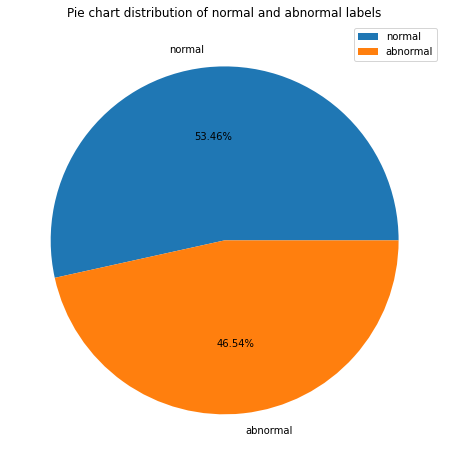

In [ ]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.savefig('plots/Pie_chart_binary.png')
plt.show()

# **Multi-class Classification**

In [ ]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [ ]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

In [ ]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
multi_data['label'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,4,0,0,0,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,4,0,0,0,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.872361,-0.037694,1.602664,1.605104,-0.374362,-0.374432,-1.184947,-0.016930,-0.374560,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.725778,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,

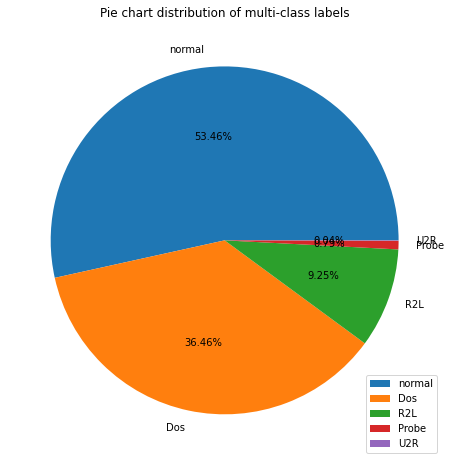

In [ ]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.savefig('plots/Pie_chart_multi.png')
plt.show()

# **Feature Extraction**

In [ ]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_bin = bin_data[numeric_col]
numeric_bin['intrusion'] = bin_data['intrusion']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [ ]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin = bin_data[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [ ]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin = numeric_bin.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','normal','label']])

In [ ]:
# saving final dataset to disk
bin_data.to_csv("./datasets/bin_data.csv")
# final dataset for binary classification
bin_data

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,...,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,abnormal
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,abnormal
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,abnormal


In [ ]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute 
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.613251
logged_in                   0.693770
srv_serror_rate             0.710852
serror_rate                 0.712861
dst_host_serror_rate        0.714247
dst_host_same_srv_rate      0.716820
dst_host_srv_serror_rate    0.717387
dst_host_srv_count          0.718579
same_srv_rate               0.798358
intrusion                   1.000000
Name: intrusion, dtype: float64

In [ ]:
# selecting attributes found by using pearson correlation coefficient
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

In [ ]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [ ]:
# saving final dataset to disk
multi_data.to_csv('./datasets/multi_data.csv')

# final dataset for multi-class classification
multi_data

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,...,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,-0.782367,-0.624871,-0.818890,0.771283,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,1,normal
1,-0.620982,-0.809262,-0.631929,-0.637209,-0.639532,-1.161030,-0.624871,-1.035688,-1.321428,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,1,normal
2,0.339648,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.809857,-1.389669,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,Dos
3,-0.690846,1.235694,-0.184522,-0.189235,-0.572083,1.066401,-0.602433,1.258754,0.771283,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,1,normal
4,-0.472521,1.235694,-0.631929,-0.637209,-0.639532,1.066401,-0.624871,1.258754,0.771283,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.818890,-1.184947,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,Dos
125969,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,0.977304,-0.624871,1.159389,0.771283,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,1,normal
125970,-0.725778,1.235694,-0.631929,-0.637209,0.979238,-0.893738,-0.624871,-0.773724,0.771283,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,1,normal
125971,0.523041,-0.809262,1.605104,1.602664,1.608759,-1.094207,1.618955,-0.972455,-1.366922,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,Dos


# **Linear Support Vector Machine Classifier (Binary Classification)**

In [ ]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path

In [ ]:
# importing library for support vector machine classifier
from sklearn.svm import SVC

In [ ]:
X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [ ]:
# using kernel as linear 
lsvm = SVC(kernel='linear',gamma='auto') 
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pkl_filename = "./models/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loaded model from disk") 

Saved model to disk
Loaded model from disk


In [ ]:
y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  96.69778370483266


In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



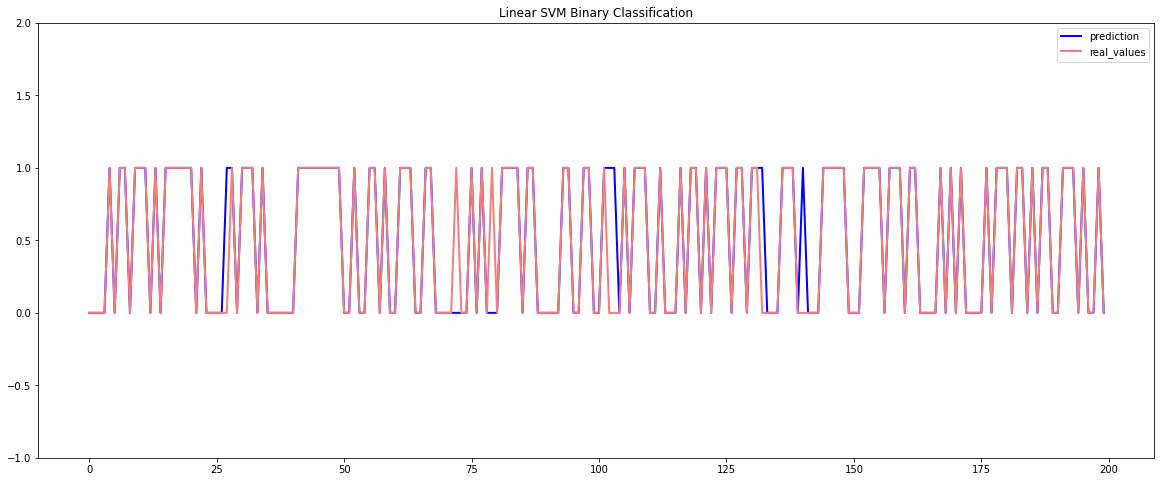

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Linear SVM Binary Classification")
plt.savefig('plots/lsvm_real_pred_bin.png')
plt.show()

# **Quadratic Support Vector Machine Classifier (Binary Classification)**

In [ ]:
qsvm=SVC(kernel='poly',gamma='auto') # using kernal as polynomial for quadratic svm
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pkl_filename = "./models/qsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
y_pred=qsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("QSVM-Classifier Binary Set-Accuracy is ", ac)

QSVM-Classifier Binary Set-Accuracy is  95.71029402425859


In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.92      0.95     14720
      normal       0.93      0.99      0.96     16774

    accuracy                           0.96     31494
   macro avg       0.96      0.95      0.96     31494
weighted avg       0.96      0.96      0.96     31494



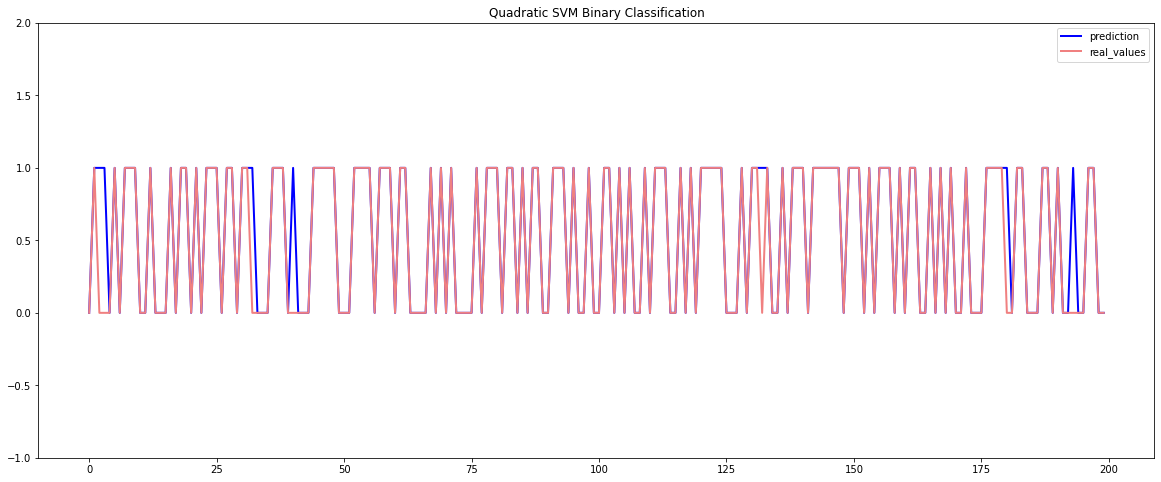

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic SVM Binary Classification")
plt.savefig('plots/qsvm_real_pred_bin.png')
plt.show()

# **K-nearest-neighbor Classifier (Binary Classification)**

In [ ]:
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5) # creating model for 5 neighbors
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pkl_filename = "./models/knn_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  98.55210516288817


In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.98      0.98     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



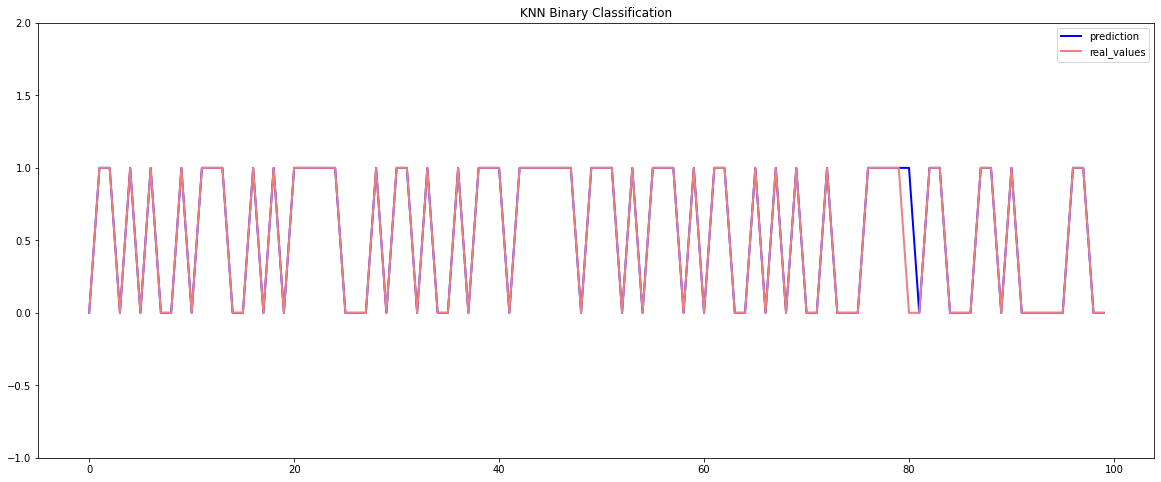

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("KNN Binary Classification")
plt.savefig('plots/knn_real_pred_bin.png')
plt.show()

# **Linear Discriminant Analysis Classifier (Binary Classification)**

In [ ]:
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train)  # training model on training dataset

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
pkl_filename = "./models/lda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
y_pred = lda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  96.70730932876104


In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



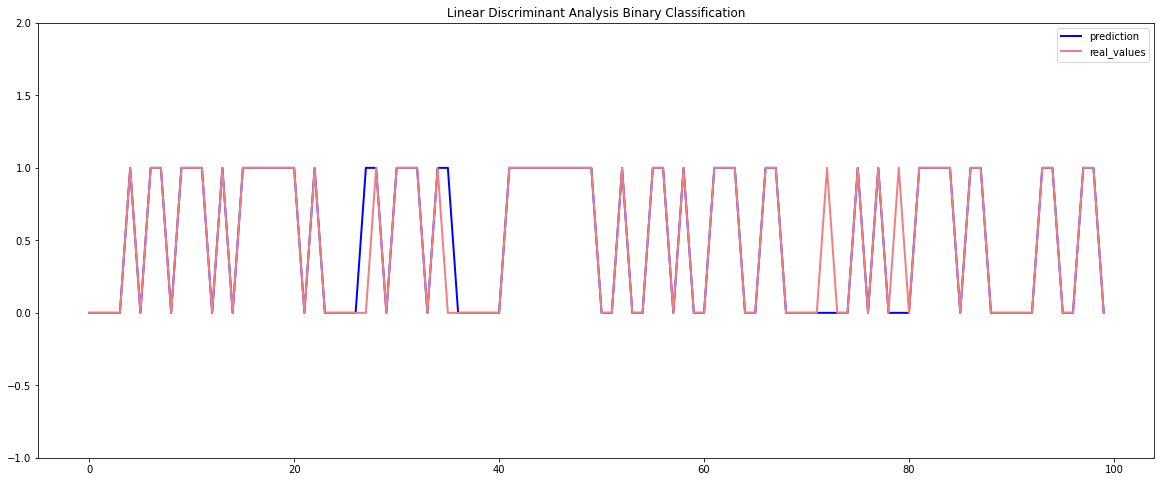

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Linear Discriminant Analysis Binary Classification")
plt.savefig('plots/lda_real_pred_bin.png')
plt.show()

# **Quadratic Discriminant Analysis Classifier (Binary Classification)**

In [ ]:
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
pkl_filename = "./models/qda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
y_pred = qda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Set-Accuracy is ", ac)

QDA-Classifier Set-Accuracy is  68.53051374865053


In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       1.00      0.33      0.49     14720
      normal       0.63      1.00      0.77     16774

    accuracy                           0.69     31494
   macro avg       0.81      0.66      0.63     31494
weighted avg       0.80      0.69      0.64     31494



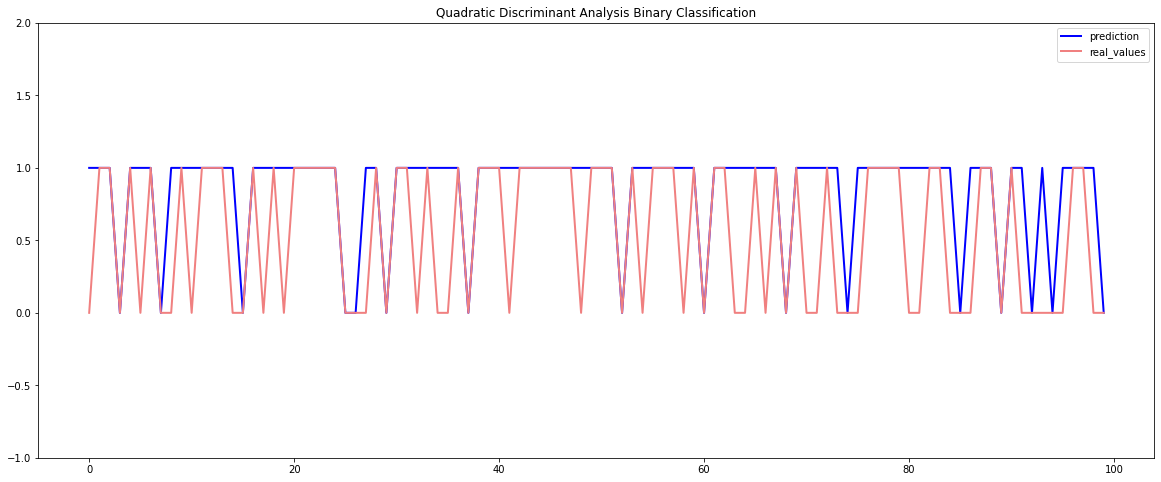

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic Discriminant Analysis Binary Classification")
plt.savefig('plots/qda_real_pred_bin.png')
plt.show()

# **Multi Layer Perceptron Classifier (Binary Classification)**

In [ ]:
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

In [ ]:
X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
mlp = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with sigmoid activation
mlp.add(Dense(units=1,activation='sigmoid'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# summary of model layers
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                4700      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 4,751
Trainable params: 4,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 18ms/step - loss: 0.5219 - accuracy: 0.7695 - val_loss: 0.4109 - val_accuracy: 0.8991
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3575 - accuracy: 0.9030 - val_loss: 0.3003 - val_accuracy: 0.9103
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.2724 - accuracy: 0.9146 - val_loss: 0.2414 - val_accuracy: 0.9214
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.2251 - accuracy: 0.9191 - val_loss: 0.2060 - val_accuracy: 0.9232
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.1945 - accuracy: 0.9259 - val_loss: 0.1815 - val_accuracy: 0.9376
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1725 - accuracy: 0.9432 - val_loss: 0.1635 - val_accuracy: 0.9508
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1559 - accuracy: 0.9549 - val_loss: 0.1498 - val_accuracy: 0.9596
Epoch 8/100


In [ ]:
filepath = './models/mlp_binary.json'
weightspath = './weights/mlp_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

985/985 [==============================] - 1s 998us/step - loss: 0.0625 - accuracy: 0.9783
Test results - Loss: 0.06249656900763512 - Accuracy: 97.8281557559967


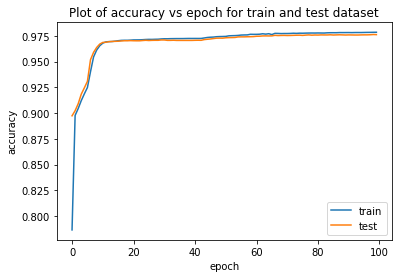

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_binary_accuracy.png')
plt.show()

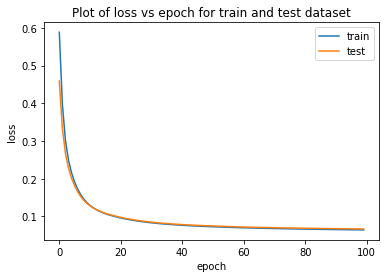

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot of loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_binary_loss.png')
plt.show()

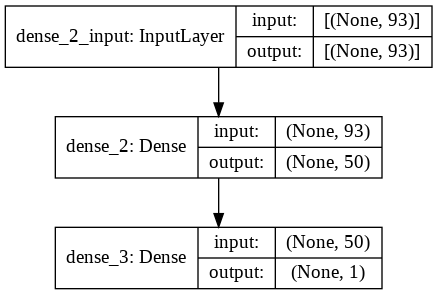

In [ ]:
# representation of model layers
from keras.utils import plot_model
plot_model(mlp, to_file='plots/mlp_binary.png', show_shapes=True,)

# **Long Short-Term Memory Classifier (Binary Classification)**

In [ ]:
# importing library for LSTM layers
from keras.layers import LSTM

In [ ]:
X = bin_data.iloc[:,0:93] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
X_train = X_train.to_numpy()

In [ ]:
x_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
lst = Sequential() # initializing model

# input layer and LSTM layer with 50 neurons
lst.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# outpute layer with sigmoid activation
lst.add(Dense(1, activation='sigmoid'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# summary of model layers
lst.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 93, 50)            10400     
_________________________________________________________________
dense_1 (Dense)              (None, 93, 1)             51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 29s 2s/step - loss: 0.6915 - accuracy: 0.5119 - val_loss: 0.6863 - val_accuracy: 0.5798
Epoch 2/100
16/16 [==============================] - 26s 2s/step - loss: 0.6487 - accuracy: 0.6194 - val_loss: 0.4693 - val_accuracy: 0.8163
Epoch 3/100
16/16 [==============================] - 25s 2s/step - loss: 0.4611 - accuracy: 0.8119 - val_loss: 0.4278 - val_accuracy: 0.8231
Epoch 4/100
16/16 [==============================] - 25s 2s/step - loss: 0.4374 - accuracy: 0.8158 - val_loss: 0.4351 - val_accuracy: 0.8118
Epoch 5/100
16/16 [==============================] - 25s 2s/step - loss: 0.4359 - accuracy: 0.8105 - val_loss: 0.4117 - val_accuracy: 0.8281
Epoch 6/100
16/16 [==============================] - 25s 2s/step - loss: 0.4162 - accuracy: 0.8260 - val_loss: 0.4076 - val_accuracy: 0.8300
Epoch 7/100
16/16 [==============================] - 25s 2s/step - loss: 0.4156 - accuracy: 0.8265 - val_loss: 0.4064 - val_accuracy: 0.8305
Epoch 8/100
1

In [ ]:
X_test = X_test.to_numpy()

In [ ]:
x_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
filepath = './models/lst_binary.json'
weightspath = './weights/lst_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  lst_json = lst.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(lst_json)

  # serialize weights to HDF5
  lst.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 10s 10ms/step - loss: 0.3087 - accuracy: 0.8306
Test results - Loss: 0.3086586892604828 - Accuracy: 83.05730819702148%


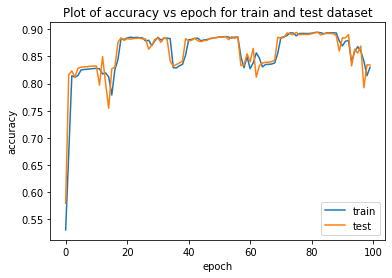

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_accuracy.png')
plt.show()

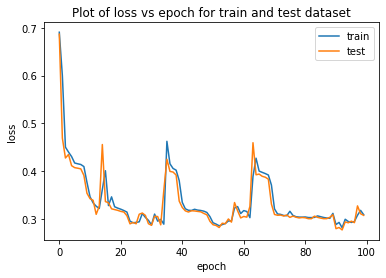

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_loss.png')
plt.show()

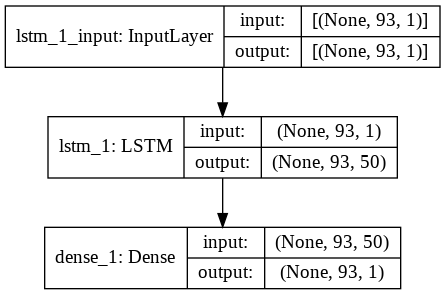

In [ ]:
# representation of model layers
plot_model(lst, to_file='plots/lstm_binary.png', show_shapes=True,)

# **Auto Encoder Classifier (Binary Classification)**

In [ ]:
from keras.layers import Input
from keras.models import Model

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [ ]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','abnormal','normal','label'],axis=1) 

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','abnormal','normal','label'],axis=1)

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [ ]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# summary of model layers
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 93)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                4700      
_________________________________________________________________
dense_5 (Dense)              (None, 93)                4743      
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1214 - accuracy: 0.0525 - val_loss: 0.1063 - val_accuracy: 0.4071
Epoch 2/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1056 - accuracy: 0.6072 - val_loss: 0.1051 - val_accuracy: 0.6891
Epoch 3/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1048 - accuracy: 0.7082 - val_loss: 0.1049 - val_accuracy: 0.7015
Epoch 4/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1048 - accuracy: 0.7324 - val_loss: 0.1048 - val_accuracy: 0.7213
Epoch 5/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.7678 - val_loss: 0.1047 - val_accuracy: 0.8029
Epoch 6/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1043 - accuracy: 0.8180 - val_loss: 0.1047 - val_accuracy: 0.8578
Epoch 7/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1044 - accuracy: 0.8400 - val_loss: 0.1047 - val_accuracy: 0.8321

In [ ]:
filepath = './models/ae_binary.json'
weightspath = './weights/ae_binary.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

985/985 [==============================] - 1s 1ms/step - loss: 0.1044 - accuracy: 0.9203
Test results - Loss: 0.10457229614257812 - Accuracy: 0.9226519465446472%


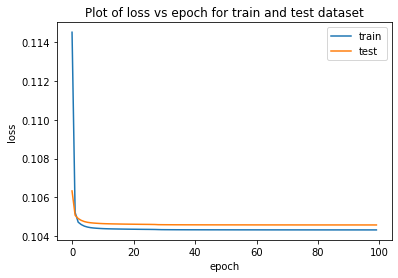

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_binary_loss.png')
plt.show()

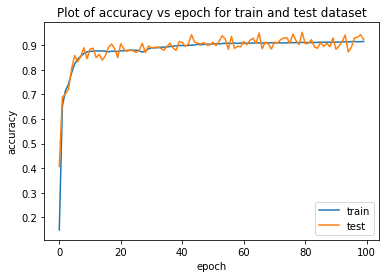

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_binary_accuracy.png')
plt.show()

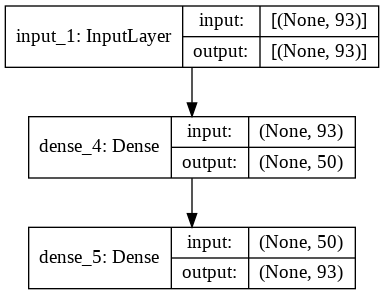

In [ ]:
# representation of model layers
plot_model(autoencoder, to_file='plots/ae_binary.png', show_shapes=True,)

In [ ]:
# calculating reconstruction error 
predictions = autoencoder.predict(X_test)

In [ ]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [ ]:
error_df.describe()

,reconstruction_error,true_class
count,31494.000000,31494.000000
mean,0.104572,0.532609
std,0.043577,0.498943
min,0.040633,0.000000
25%,0.074506,0.000000
50%,0.083821,1.000000
75%,0.151405,1.000000
max,0.229802,1.000000


# **Linear Support Vector Machine Classifier (Multi-class Classification)**

In [ ]:
X = multi_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded, original)
Y = multi_data['intrusion'] # target attribute

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
lsvm=SVC(kernel='linear',gamma='auto')
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# saving trained model to disk
pkl_filename = "./models/lsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loade model from disk")
  

Saved model to disk
Loade model from disk


In [ ]:
y_pred=lsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LSVM-Classifier Multi-class Set-Accuracy is ", ac)

LSVM-Classifier Multi-class Set-Accuracy is  95.24671365974471


In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.95      0.96      0.96     11484
       Probe       0.86      0.79      0.82      2947
         R2L       0.61      0.60      0.60       274
         U2R       0.00      0.00      0.00        15
      normal       0.97      0.98      0.98     16774

    accuracy                           0.95     31494
   macro avg       0.68      0.67      0.67     31494
weighted avg       0.95      0.95      0.95     31494



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


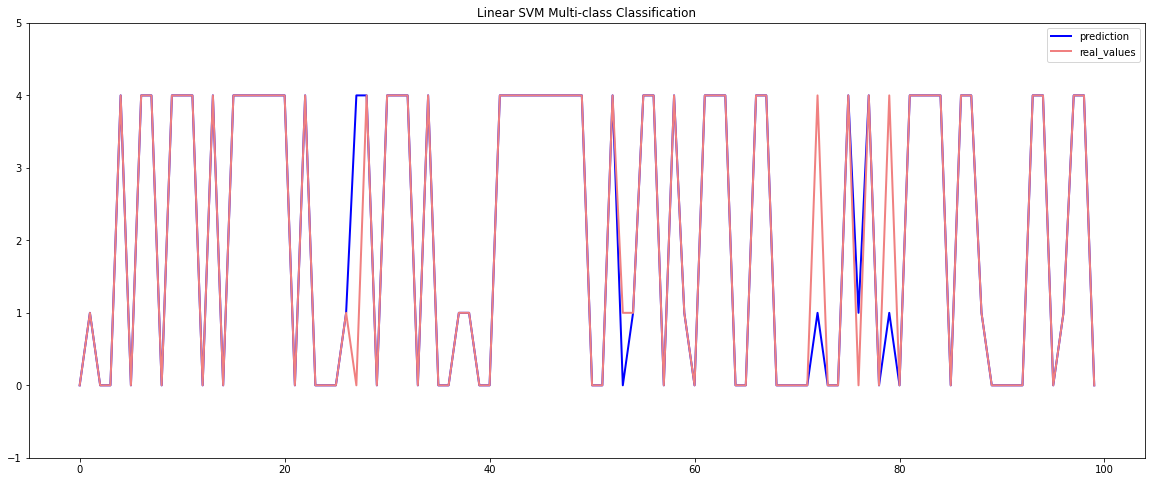

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Linear SVM Multi-class Classification")
plt.savefig('plots/lsvm_real_pred_multi.png')
plt.show()

# **Quadratic Support Vector Machine Classifier (Multi-class Classification)**

In [ ]:
qsvm=SVC(kernel='poly',gamma='auto')
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pkl_filename = "./models/qsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
y_pred=qsvm.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QSVM-Classifier Multi-class Set-Accuracy is ", ac)

QSVM-Classifier Multi-class Set-Accuracy is  92.86213246967677


In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.96      0.94      0.95     11484
       Probe       0.96      0.61      0.74      2947
         R2L       0.00      0.00      0.00       274
         U2R       0.00      0.00      0.00        15
      normal       0.91      1.00      0.95     16774

    accuracy                           0.93     31494
   macro avg       0.56      0.51      0.53     31494
weighted avg       0.92      0.93      0.92     31494



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


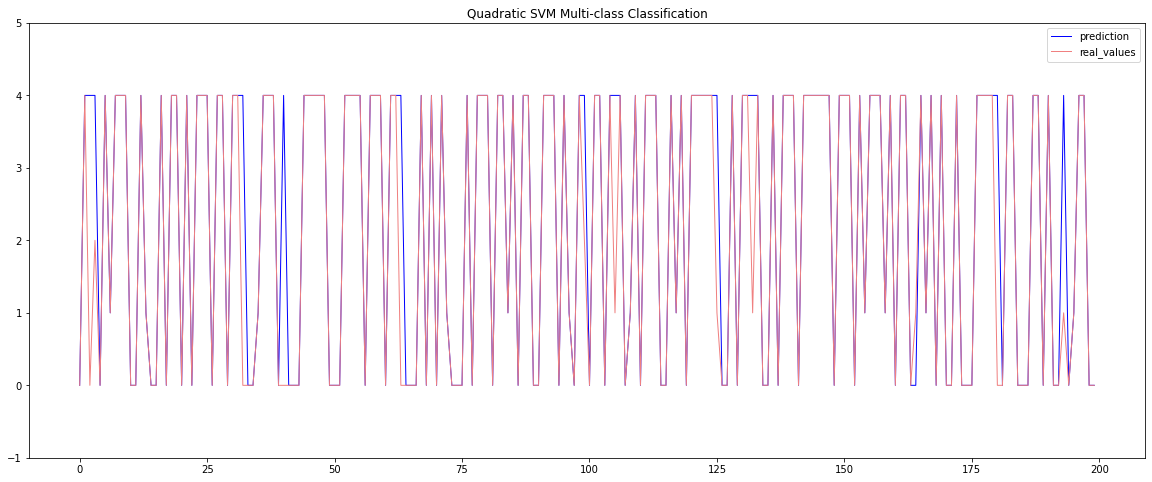

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=1.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=1.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Quadratic SVM Multi-class Classification")
plt.savefig('plots/qsvm_real_pred_multi.png')
plt.show()

# **K-nearest-neighbor Classifier (Multi-class Classification)**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pkl_filename = "./models/knn_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
y_pred=knn.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Multi-class Set-Accuracy is ", ac)

KNN-Classifier Multi-class Set-Accuracy is  98.29173810884613


In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.99      0.99     11484
       Probe       0.96      0.97      0.96      2947
         R2L       0.92      0.87      0.89       274
         U2R       0.40      0.13      0.20        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.85      0.79      0.81     31494
weighted avg       0.98      0.98      0.98     31494



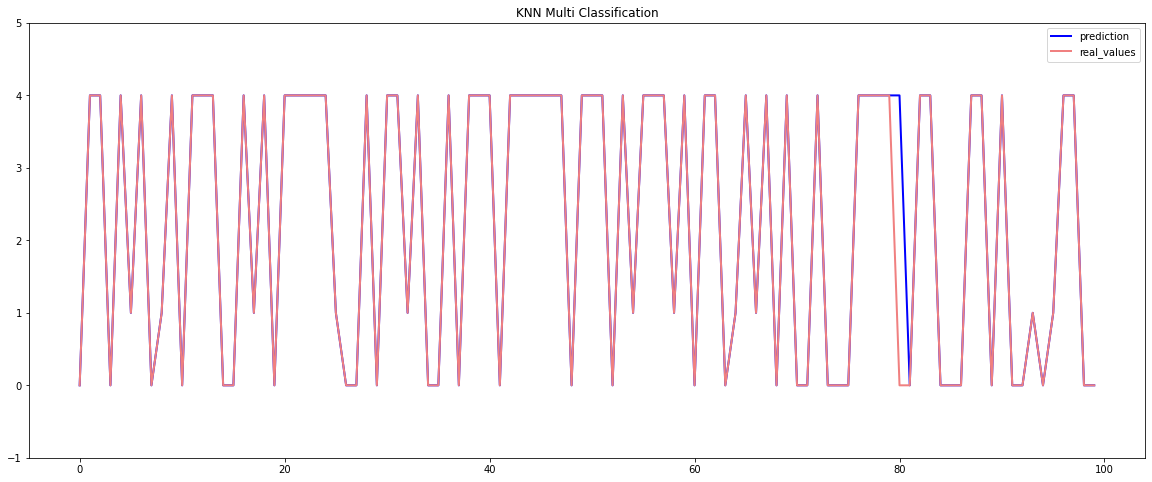

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("KNN Multi Classification")
plt.savefig('plots/knn_real_pred_multi.png')
plt.show()

# **Linear Discriminant Analysis Classifier (Multi-class Classification)**

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # training model on training dataset

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
pkl_filename = "./models/lda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")
  

Saved model to disk
Loaded model from disk


In [ ]:
y_pred = lda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  93.1923540991935


In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.94      0.96      0.95     11484
       Probe       0.88      0.73      0.80      2947
         R2L       0.37      0.89      0.52       274
         U2R       0.03      0.47      0.06        15
      normal       0.97      0.95      0.96     16774

    accuracy                           0.93     31494
   macro avg       0.64      0.80      0.66     31494
weighted avg       0.94      0.93      0.94     31494



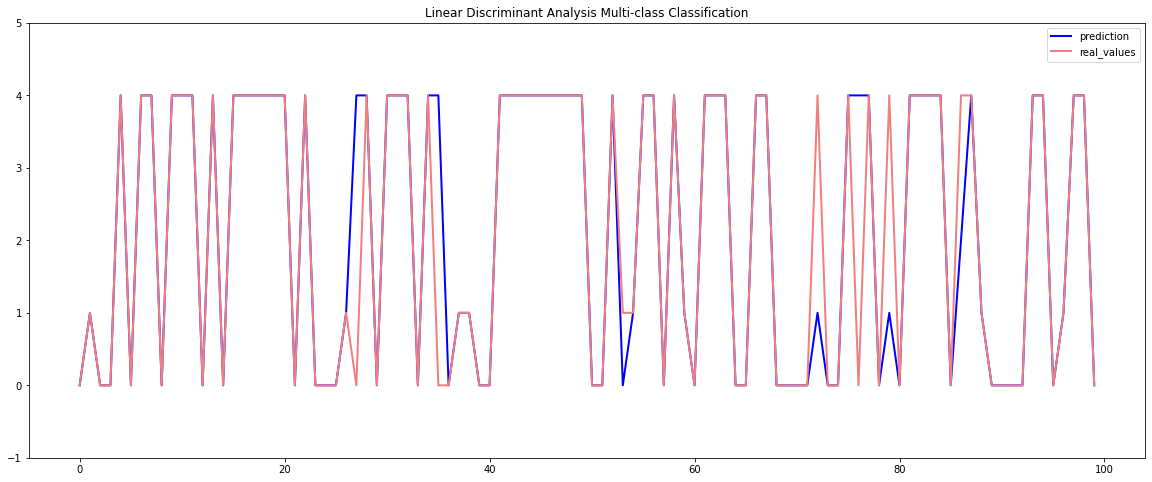

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Linear Discriminant Analysis Multi-class Classification")
plt.savefig('plots/lda_real_pred_multi.png')
plt.show()

# **Quadratic Discriminant Analysis Classifier (Multi-class Classification)**

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
pkl_filename = "./models/qda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
y_pred = qda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Multi-class Set-Accuracy is ", ac)

QDA-Classifier Multi-class Set-Accuracy is  44.98317139772655


In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.42      0.59     11484
       Probe       0.97      0.06      0.11      2947
         R2L       0.03      1.00      0.06       274
         U2R       0.00      0.00      0.00        15
      normal       0.50      0.53      0.51     16774

    accuracy                           0.45     31494
   macro avg       0.50      0.40      0.26     31494
weighted avg       0.72      0.45      0.50     31494



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


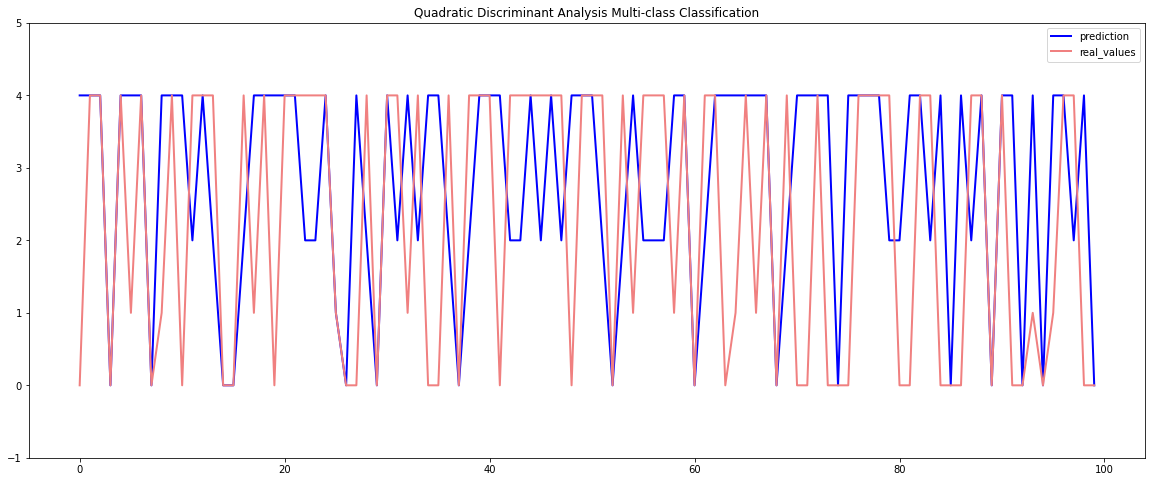

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Quadratic Discriminant Analysis Multi-class Classification")
plt.savefig('plots/qda_real_pred_multi.png')
plt.show()

# **Multi Layer Perceptron Classifier (Multi-class Classification)**

In [ ]:
X = multi_data.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=5,activation='softmax'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# summary of model layers
mlp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                4700      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 255       
Total params: 4,955
Trainable params: 4,955
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 33ms/step - loss: 1.6282 - accuracy: 0.2066 - val_loss: 1.2330 - val_accuracy: 0.5749
Epoch 2/100
16/16 [==============================] - 0s 13ms/step - loss: 1.1306 - accuracy: 0.6717 - val_loss: 0.8474 - val_accuracy: 0.8593
Epoch 3/100
16/16 [==============================] - 0s 13ms/step - loss: 0.7775 - accuracy: 0.8580 - val_loss: 0.5909 - val_accuracy: 0.8665
Epoch 4/100
16/16 [==============================] - 0s 14ms/step - loss: 0.5489 - accuracy: 0.8655 - val_loss: 0.4435 - val_accuracy: 0.8720
Epoch 5/100
16/16 [==============================] - 0s 13ms/step - loss: 0.4206 - accuracy: 0.8718 - val_loss: 0.3650 - val_accuracy: 0.8760
Epoch 6/100
16/16 [==============================] - 0s 13ms/step - loss: 0.3533 - accuracy: 0.8797 - val_loss: 0.3201 - val_accuracy: 0.9093
Epoch 7/100
16/16 [==============================] - 0s 13ms/step - loss: 0.3122 - accuracy: 0.9118 - val_loss: 0.2901 - val_accuracy: 0.9267
Epoch 

In [ ]:
filepath = './models/mlp_multi.json'
weightspath = './weights/mlp_multi.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")
  
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 1s 936us/step - loss: 0.0941 - accuracy: 0.9682
Test results - Loss: 0.0895298421382904 - Accuracy: 96.92639708518982%


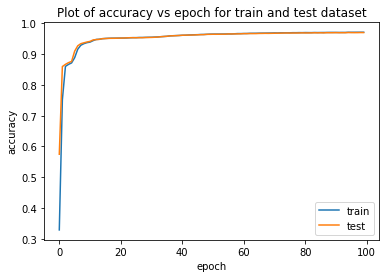

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

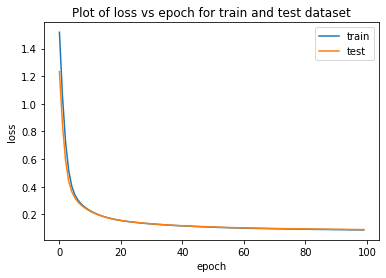

In [ ]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/mlp_multi_loss.png')
plt.show()

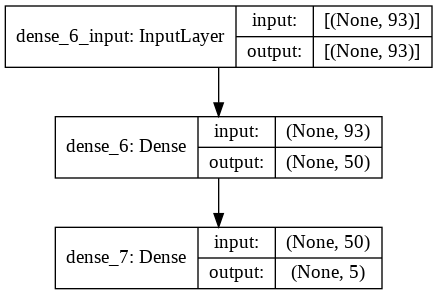

In [ ]:
# representation of model layers
plot_model(mlp, to_file='plots/mlp_multi.png', show_shapes=True,)

# **Auto Encoder Classifier (Multi-class Classification)**

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(multi_data, test_size=0.25, random_state=42)

In [ ]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [ ]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# summary of model layers
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 93)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                4700      
_________________________________________________________________
dense_9 (Dense)              (None, 93)                4743      
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1211 - accuracy: 0.1116 - val_loss: 0.1060 - val_accuracy: 0.3333
Epoch 2/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1054 - accuracy: 0.4788 - val_loss: 0.1051 - val_accuracy: 0.6918
Epoch 3/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1048 - accuracy: 0.6864 - val_loss: 0.1049 - val_accuracy: 0.6834
Epoch 4/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.7274 - val_loss: 0.1048 - val_accuracy: 0.7741
Epoch 5/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1044 - accuracy: 0.7674 - val_loss: 0.1048 - val_accuracy: 0.8045
Epoch 6/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.8088 - val_loss: 0.1047 - val_accuracy: 0.8379
Epoch 7/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1047 - accuracy: 0.8389 - val_loss: 0.1047 - val_accuracy: 0.8338

In [ ]:
filepath = './models/ae_multi.json'
weightspath = './weights/ae_multi.h5'
if (not path.isfile(filepath)):  
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 1s 989us/step - loss: 0.1044 - accuracy: 0.9095
Test results - Loss: 0.10456941276788712 - Accuracy: 91.22689962387085%


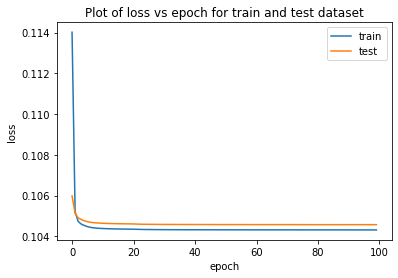

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_multi_loss.png')
plt.show()

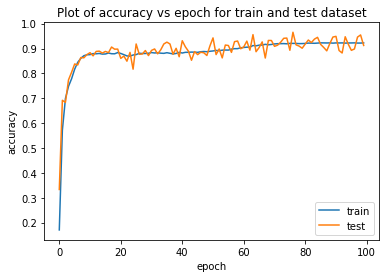

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_multi_accuracy.png')
plt.show()

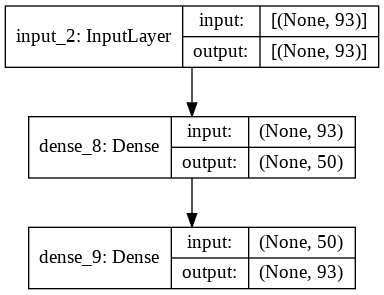

In [ ]:
# representation of model layers
plot_model(autoencoder, to_file='plots/ae_multi.png', show_shapes=True,)

In [ ]:
# calculating reconstruction error
predictions = autoencoder.predict(X_test)

In [ ]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [ ]:
error_df.describe()

,reconstruction_error,true_class
count,31494.000000,31494.000000
mean,0.104569,2.242840
std,0.043572,1.903732
min,0.040634,0.000000
25%,0.074501,0.000000
50%,0.083821,4.000000
75%,0.151404,4.000000
max,0.229786,4.000000
